<h1>Student Grade Prediction - Data Analysis</h1>

#### Attribute Information:

1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
<br>
2 sex - student's sex (binary: 'F' - female or 'M' - male)
<br>
3 age - student's age (numeric: from 15 to 22)
<br>
4 address - student's home address type (binary: 'U' - urban or 'R' - rural)
<br>
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
<br>
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
<br>
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
<br>
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
<br>
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
<br>
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
<br>
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
<br>
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')
<br>
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
<br>
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
<br>
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)
<br>
16 schoolsup - extra educational support (binary: yes or no)
<br>
17 famsup - family educational support (binary: yes or no)
<br>
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
<br>
19 activities - extra-curricular activities (binary: yes or no)
<br>
20 nursery - attended nursery school (binary: yes or no)
<br>
21 higher - wants to take higher education (binary: yes or no)
<br>
22 internet - Internet access at home (binary: yes or no)
<br>
23 romantic - with a romantic relationship (binary: yes or no)
<br>
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
<br>
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)
<br>
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)
<br>
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
<br>
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
<br>
29 health - current health status (numeric: from 1 - very bad to 5 - very good)
<br>
30 absences - number of school absences (numeric: from 0 to 93)
<br>
31 G1 - first period grade (numeric: from 0 to 20)
<br>
32 G2 - second period grade (numeric: from 0 to 20)
<br>
33 G3 - final grade (numeric: from 0 to 20, output target)
<br>


#### Source: 
https://archive.ics.uci.edu/ml/datasets/student+performance

<h3>Import Dependencies</h3>

In [1]:
#import relevant library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string


<h3>Load Dataset</h3>

In [2]:
#import dataset 
dataset = pd.read_csv('student_dataset.csv')
pd.set_option('display.max_columns',80)
dataset.tail()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10
394,MS,M,19,U,LE3,T,1,1,other,at_home,course,father,1,1,0,no,no,no,no,yes,yes,yes,no,3,2,3,3,3,5,5,8,9,9


<h3>Data Preparation</h3>

In [3]:
#check the dataset columns
dataset.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [4]:
dataset.rename(columns={
    "school":"school",
    'sex':'gender',
    'age':'age',
    'address':'address',
    'famsize':'family_size',
    'Pstatus':'parent_cohabitation',
    'Medu':'mother_edu',
    'Fedu':'father_edu',
    'Mjob':'mother_job',
    'Fjob':'father_job',
    'reason':'reason',
    'guardian':'guardian',
    'traveltime':'travel_time',
    'studytime':'study_time',
    'failures':'number_fail_class',
    'schoolsup':'school_support',
    'famsup':'family_support',
    'paid':'extra_paid_class',
    'activities':'extra_activity_curriculum',
    'nursery':'nursery',
    'higher':'higher',
    'internet':'home_internet',
    'romatic':'romatic',
    'famrel':'family_relationship',
    'freetime':'free_time',
    'goout':'go_out',
    'Dalc':'daily_alcohol',
    'Walc':'week_alcohol',
    'health':'current_health',
    'absences':'number_absences',
    'G1':'first_grade',
    'G2':'second_grade',
    'G3':'final_grade'
}, inplace=True)

In [5]:
#check dimensions and samples
def check_number_data(data):
    print("Number of Dimensions: ", dataset.shape[1])
    print("*" *30)
    print("Number of Samples: ", dataset.shape[0])
    
#check the info and data types
def check_data_info(data):
    result = dataset.info()
    return result

#check dataset's null or not
def check_null_values(data):
    sum_sam = dataset.isnull().sum()
    return sum_sam

def check_duplicate_values(data):
    data = dataset
    r = dataset.duplicated().any()
    if r == True:
        print("Dataset has duplicated values")
    else:
        print("Dataset has NO duplicated values")

In [6]:
#check dimension and samples
check_number_data(dataset)

Number of Dimensions:  33
******************************
Number of Samples:  395


In [7]:
#check the info and data types
check_data_info(dataset)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   school                     395 non-null    object
 1   gender                     395 non-null    object
 2   age                        395 non-null    int64 
 3   address                    395 non-null    object
 4   family_size                395 non-null    object
 5   parent_cohabitation        395 non-null    object
 6   mother_edu                 395 non-null    int64 
 7   father_edu                 395 non-null    int64 
 8   mother_job                 395 non-null    object
 9   father_job                 395 non-null    object
 10  reason                     395 non-null    object
 11  guardian                   395 non-null    object
 12  travel_time                395 non-null    int64 
 13  study_time                 395 non-null    int64 
 14  number_fai

In [8]:
#check the dataset is null or not
check_null_values(dataset)

school                       0
gender                       0
age                          0
address                      0
family_size                  0
parent_cohabitation          0
mother_edu                   0
father_edu                   0
mother_job                   0
father_job                   0
reason                       0
guardian                     0
travel_time                  0
study_time                   0
number_fail_class            0
school_support               0
family_support               0
extra_paid_class             0
extra_activity_curriculum    0
nursery                      0
higher                       0
home_internet                0
romantic                     0
family_relationship          0
free_time                    0
go_out                       0
daily_alcohol                0
week_alcohol                 0
current_health               0
number_absences              0
first_grade                  0
second_grade                 0
final_gr

In [9]:
#check the duplicated values
check_duplicate_values(dataset)

Dataset has NO duplicated values


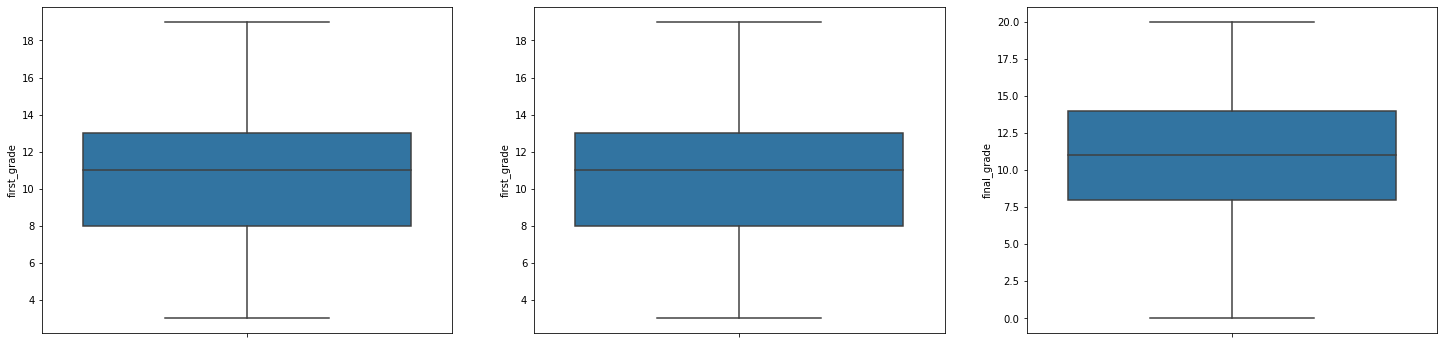

In [90]:
#check outlier
f, axes = plt.subplots(ncols=3, figsize=(25, 6))

sns.boxplot(y=dataset['first_grade'], ax=axes[0])
sns.boxplot(y=dataset['first_grade'], ax=axes[1])
sns.boxplot(y=dataset['final_grade'], ax=axes[2])
plt.show()

<h3>Data Analysis</h3>

In [10]:
#check unique_values
def check_unique_values(series):
    result = series.unique()
    print("*" * 54)
    return result
#check value_counts
def check_value_counts(series):
    result = series.value_counts()
    print("*" * 54)
    return result

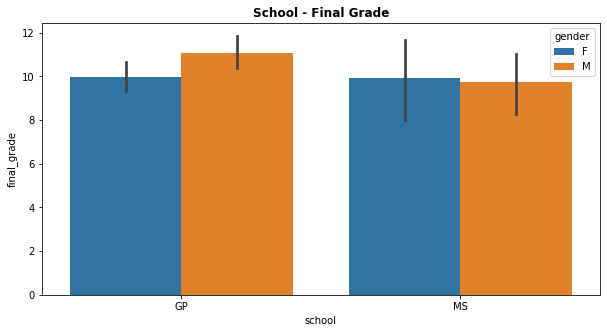

In [11]:
#school with grade
#sns.barplot(x='final_grade', data=dataset)
plt.figure(figsize=(10,5))
sns.barplot(x="school", y="final_grade", hue="gender", data=dataset)
plt.title('School - Final Grade', fontweight='bold')
plt.show()

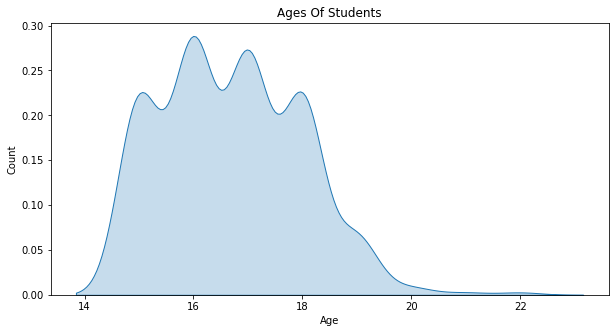

In [65]:
plt.figure(figsize=(10,5))
b = sns.kdeplot(dataset['age'], shade=True)
b.axes.set_title('Ages Of Students')
b.set_xlabel('Age')
b.set_ylabel('Count')
plt.show()

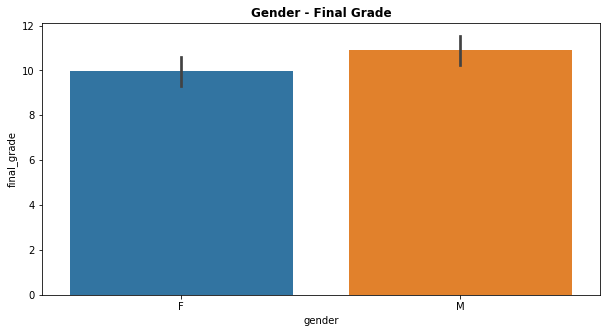

******************************************************


F    208
M    187
Name: gender, dtype: int64

In [12]:
#gender with grade
plt.figure(figsize=(10,5))
sns.barplot(x="gender", y="final_grade", data=dataset)
plt.title('Gender - Final Grade', fontweight='bold')
plt.show()

check_value_counts(dataset.gender)

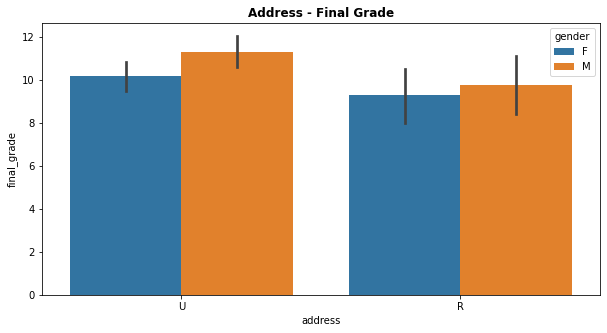

******************************************************


U    307
R     88
Name: address, dtype: int64

In [13]:
#address with grade
plt.figure(figsize=(10,5))
sns.barplot(x="address", y="final_grade", hue="gender", data=dataset)
plt.title('Address - Final Grade', fontweight='bold')
plt.show()

check_value_counts(dataset.address)

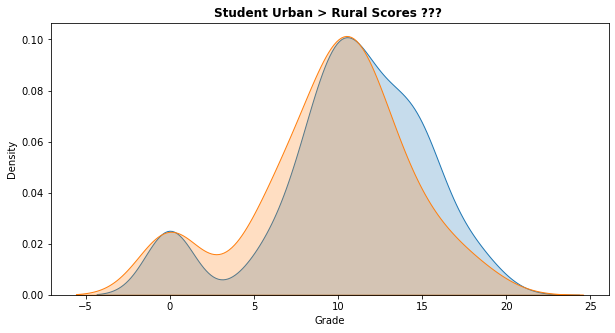

In [100]:
# Grade distribution by address
plt.figure(figsize=(10,5))
sns.kdeplot(dataset.loc[dataset['address'] == 'U', 'final_grade'], label='Urban', shade = True)
sns.kdeplot(dataset.loc[dataset['address'] == 'R', 'final_grade'], label='Rural', shade = True)
plt.title('Student Urban > Rural Scores ??? ', fontweight='bold')
plt.xlabel('Grade')
plt.ylabel('Density')
plt.show()

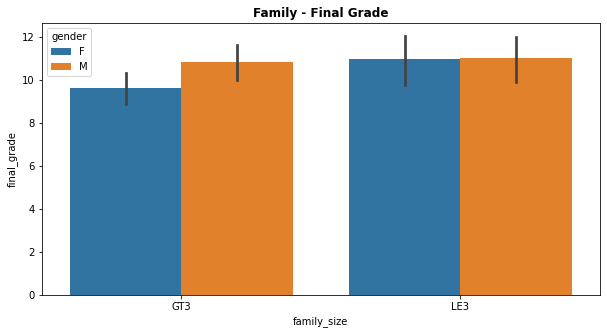

******************************************************


GT3    281
LE3    114
Name: family_size, dtype: int64

In [16]:
#parent's cohabitation - grade
plt.figure(figsize=(10,5))
sns.barplot(x="family_size", y="final_grade", hue="gender", data=dataset)
plt.title('Family - Final Grade', fontweight='bold')
plt.show()

check_value_counts(dataset.family_size)

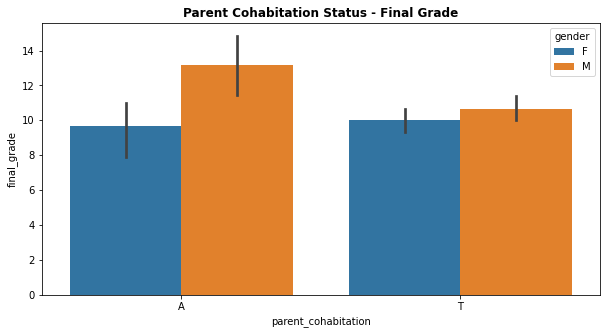

******************************************************


T    354
A     41
Name: parent_cohabitation, dtype: int64

In [14]:
#parent's cohabitation - grade
plt.figure(figsize=(10,5))
sns.barplot(x="parent_cohabitation", y="final_grade", hue="gender", data=dataset)
plt.title('Parent Cohabitation Status - Final Grade', fontweight='bold')
plt.show()

check_value_counts(dataset.parent_cohabitation)

In [28]:
#plt.figure(figsize=(15,5))
#dataset.hist()
#plt.show()

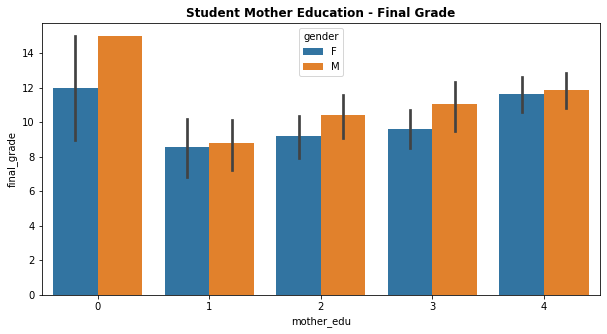

******************************************************


4    131
2    103
3     99
1     59
0      3
Name: mother_edu, dtype: int64

In [29]:
plt.figure(figsize=(10,5))
sns.barplot(x="mother_edu", y="final_grade", hue="gender", data=dataset)
plt.title('Student Mother Education - Final Grade', fontweight='bold')
plt.show()

check_value_counts(dataset.mother_edu)

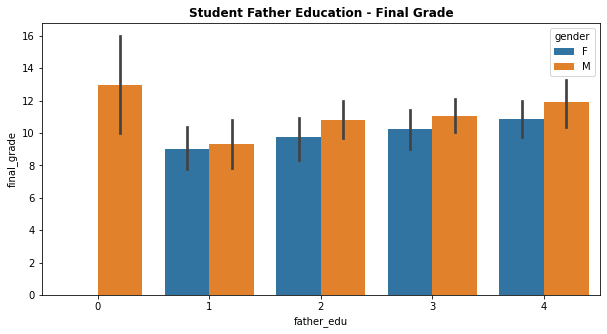

******************************************************


2    115
3    100
4     96
1     82
0      2
Name: father_edu, dtype: int64

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(x="father_edu", y="final_grade", hue="gender", data=dataset)
plt.title('Student Father Education - Final Grade', fontweight='bold')
plt.show()

check_value_counts(dataset.father_edu)

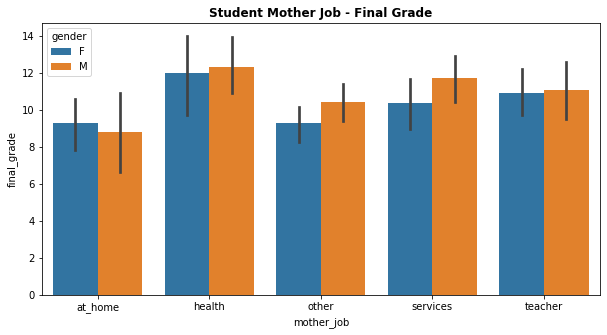

******************************************************


other       141
services    103
at_home      59
teacher      58
health       34
Name: mother_job, dtype: int64

In [31]:
plt.figure(figsize=(10,5))
sns.barplot(x="mother_job", y="final_grade", hue="gender", data=dataset)
plt.title('Student Mother Job - Final Grade', fontweight='bold')
plt.show()

check_value_counts(dataset.mother_job)

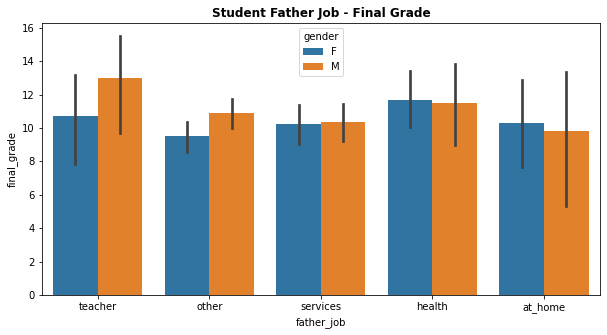

******************************************************


other       217
services    111
teacher      29
at_home      20
health       18
Name: father_job, dtype: int64

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(x="father_job", y="final_grade", hue="gender", data=dataset)
plt.title('Student Father Job - Final Grade', fontweight='bold')
plt.show()

check_value_counts(dataset.father_job)

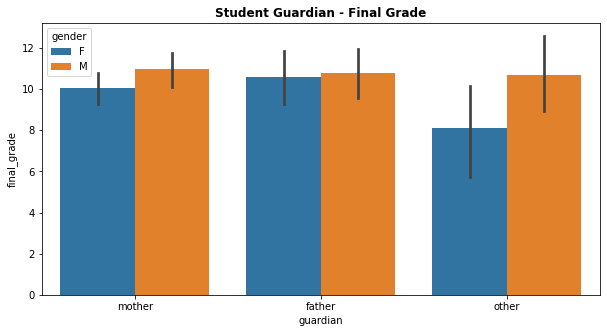

******************************************************


mother    273
father     90
other      32
Name: guardian, dtype: int64

In [33]:
plt.figure(figsize=(10,5))
sns.barplot(x="guardian", y="final_grade", hue="gender", data=dataset)
plt.title('Student Guardian - Final Grade', fontweight='bold')
plt.show()

check_value_counts(dataset.guardian)

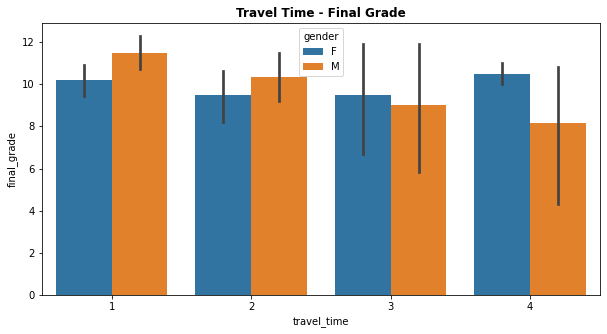

******************************************************


1    257
2    107
3     23
4      8
Name: travel_time, dtype: int64

In [34]:
plt.figure(figsize=(10,5))
sns.barplot(x="travel_time", y="final_grade", hue="gender", data=dataset)
plt.title('Travel Time - Final Grade', fontweight='bold')
plt.show()

check_value_counts(dataset.travel_time)

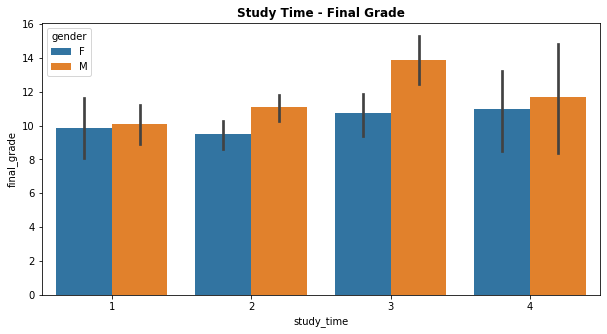

******************************************************


2    198
1    105
3     65
4     27
Name: study_time, dtype: int64

In [35]:
plt.figure(figsize=(10,5))
sns.barplot(x="study_time", y="final_grade", hue="gender", data=dataset)
plt.title('Study Time - Final Grade', fontweight='bold')
plt.show()

check_value_counts(dataset.study_time)

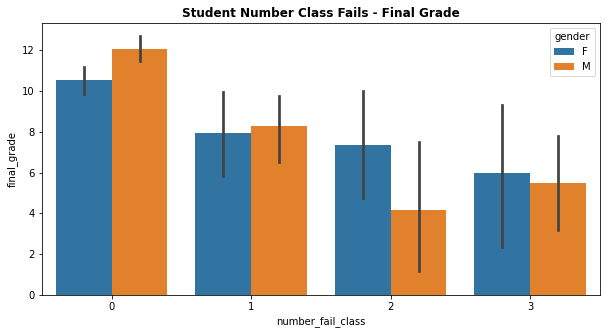

******************************************************


0    312
1     50
2     17
3     16
Name: number_fail_class, dtype: int64

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(x="number_fail_class", y="final_grade", hue="gender", data=dataset)
plt.title('Student Number Class Fails - Final Grade', fontweight='bold')
plt.show()

check_value_counts(dataset.number_fail_class)

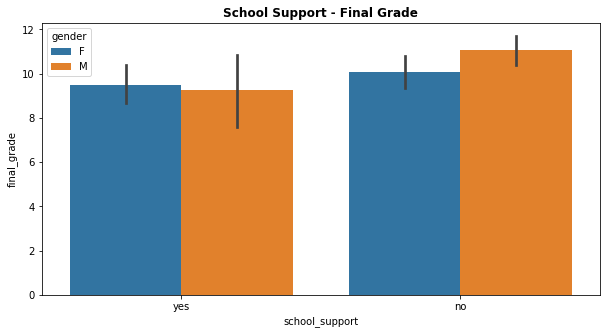

******************************************************


no     344
yes     51
Name: school_support, dtype: int64

In [39]:
plt.figure(figsize=(10,5))
sns.barplot(x="school_support", y="final_grade", hue="gender", data=dataset)
plt.title('School Support - Final Grade', fontweight='bold')
plt.show()

check_value_counts(dataset.school_support)

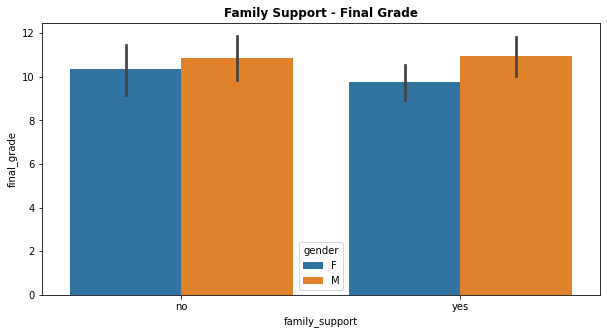

******************************************************


yes    242
no     153
Name: family_support, dtype: int64

In [40]:
plt.figure(figsize=(10,5))
sns.barplot(x="family_support", y="final_grade", hue="gender", data=dataset)
plt.title('Family Support - Final Grade', fontweight='bold')
plt.show()

check_value_counts(dataset.family_support)

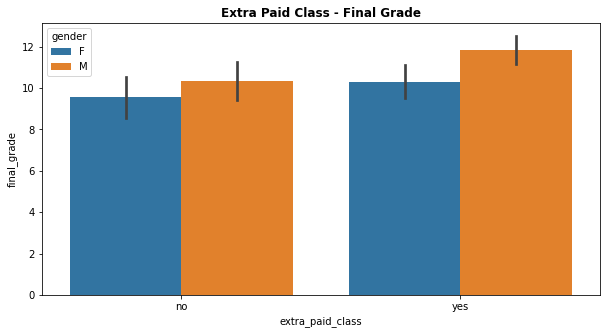

******************************************************


no     214
yes    181
Name: extra_paid_class, dtype: int64

In [42]:
plt.figure(figsize=(10,5))
sns.barplot(x="extra_paid_class", y="final_grade", hue="gender", data=dataset)
plt.title('Extra Paid Class - Final Grade', fontweight='bold')
plt.show()

check_value_counts(dataset.extra_paid_class)

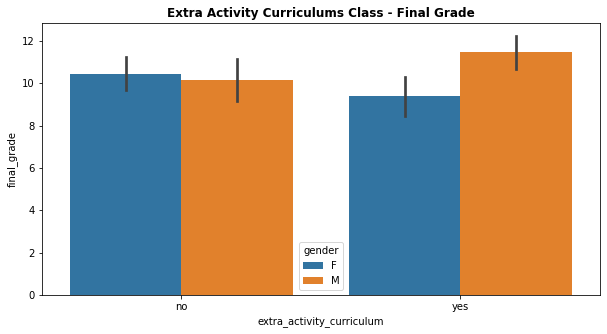

******************************************************


yes    201
no     194
Name: extra_activity_curriculum, dtype: int64

In [43]:
plt.figure(figsize=(10,5))
sns.barplot(x="extra_activity_curriculum", y="final_grade", hue="gender", data=dataset)
plt.title('Extra Activity Curriculums Class - Final Grade', fontweight='bold')
plt.show()

check_value_counts(dataset.extra_activity_curriculum)

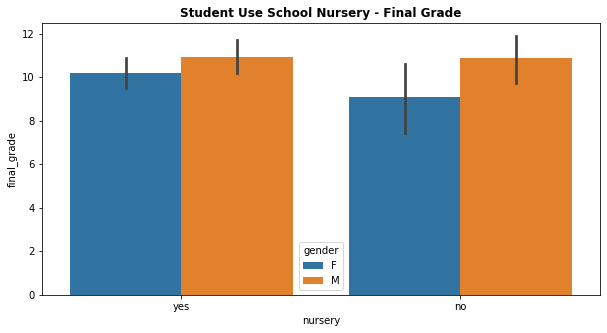

******************************************************


yes    314
no      81
Name: nursery, dtype: int64

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(x="nursery", y="final_grade", hue="gender", data=dataset)
plt.title('Student Use School Nursery - Final Grade', fontweight='bold')
plt.show()b

check_value_counts(dataset.nursery)

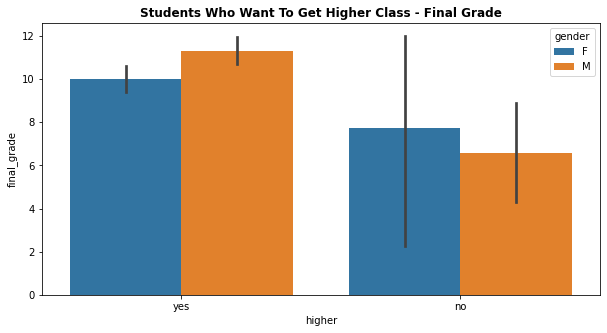

******************************************************


yes    375
no      20
Name: higher, dtype: int64

In [45]:
plt.figure(figsize=(10,5))
sns.barplot(x="higher", y="final_grade", hue="gender", data=dataset)
plt.title('Students Who Want To Get Higher Class - Final Grade', fontweight='bold')
plt.show()

check_value_counts(dataset.higher)

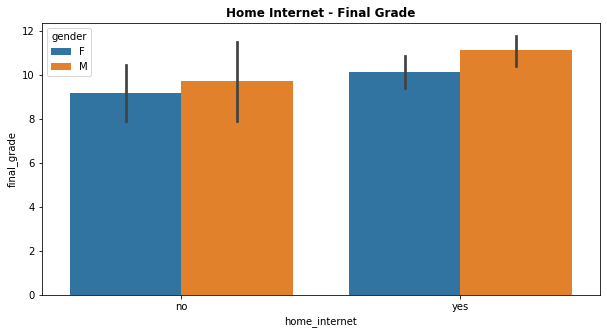

******************************************************


yes    329
no      66
Name: home_internet, dtype: int64

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(x="home_internet", y="final_grade", hue="gender", data=dataset)
plt.title('Home Internet - Final Grade', fontweight='bold')
plt.show()

check_value_counts(dataset.home_internet)

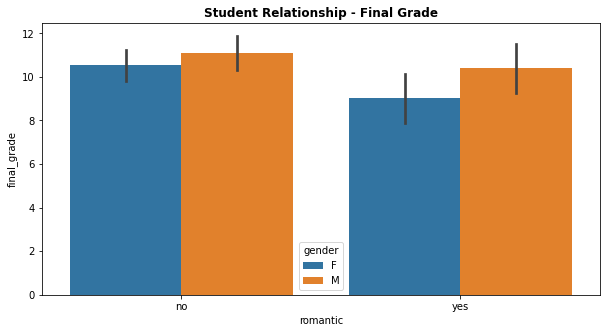

******************************************************


no     263
yes    132
Name: romantic, dtype: int64

In [47]:
plt.figure(figsize=(10,5))
sns.barplot(x="romantic", y="final_grade", hue="gender", data=dataset)
plt.title('Student Relationship - Final Grade', fontweight='bold')
plt.show()

check_value_counts(dataset.romantic)

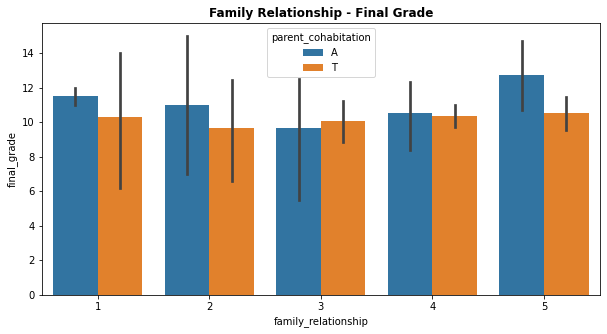

******************************************************


4    195
5    106
3     68
2     18
1      8
Name: family_relationship, dtype: int64

In [50]:
plt.figure(figsize=(10,5))
sns.barplot(x="family_relationship", y="final_grade", hue="parent_cohabitation", data=dataset)
plt.title('Family Relationship - Final Grade', fontweight='bold')
plt.show()

check_value_counts(dataset.family_relationship)

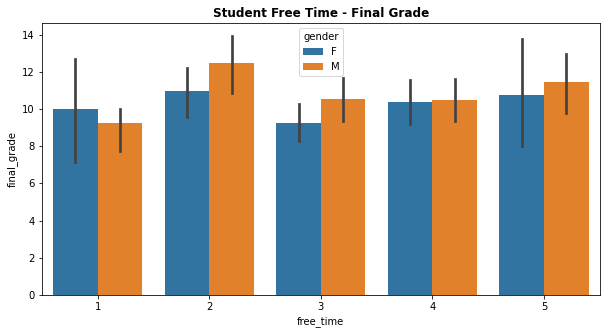

******************************************************


3    157
4    115
2     64
5     40
1     19
Name: free_time, dtype: int64

In [52]:
plt.figure(figsize=(10,5))
sns.barplot(x="free_time", y="final_grade", hue="gender", data=dataset)
plt.title('Student Free Time - Final Grade', fontweight='bold')
plt.show()

check_value_counts(dataset.free_time)

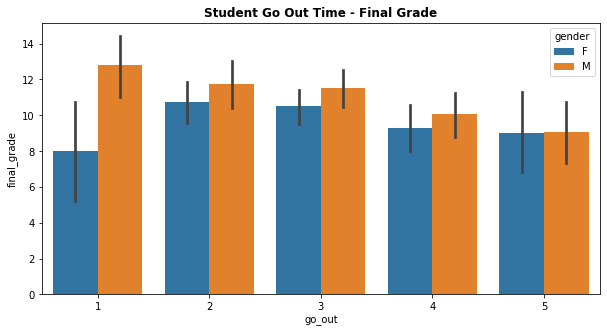

******************************************************


3    130
2    103
4     86
5     53
1     23
Name: go_out, dtype: int64

In [53]:
plt.figure(figsize=(10,5))
sns.barplot(x="go_out", y="final_grade", hue="gender", data=dataset)
plt.title('Student Go Out Time - Final Grade', fontweight='bold')
plt.show()

check_value_counts(dataset.go_out)

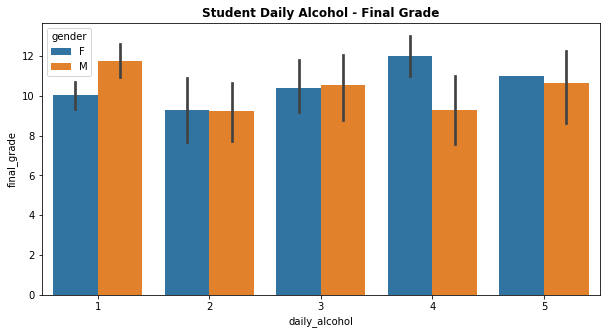

******************************************************


1    276
2     75
3     26
5      9
4      9
Name: daily_alcohol, dtype: int64

In [54]:
plt.figure(figsize=(10,5))
sns.barplot(x="daily_alcohol", y="final_grade", hue="gender", data=dataset)
plt.title('Student Daily Alcohol - Final Grade', fontweight='bold')
plt.show()

check_value_counts(dataset.daily_alcohol)

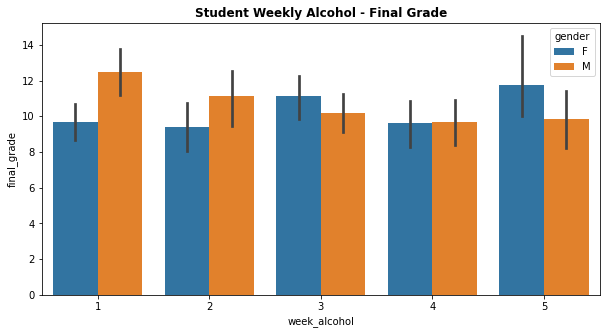

******************************************************


1    151
2     85
3     80
4     51
5     28
Name: week_alcohol, dtype: int64

In [55]:
plt.figure(figsize=(10,5))
sns.barplot(x="week_alcohol", y="final_grade", hue="gender", data=dataset)
plt.title('Student Weekly Alcohol - Final Grade', fontweight='bold')
plt.show()

check_value_counts(dataset.week_alcohol)

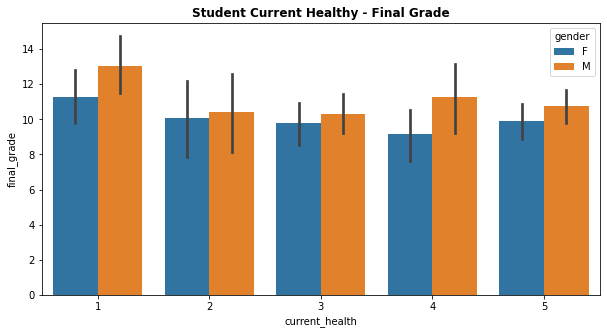

******************************************************


5    146
3     91
4     66
1     47
2     45
Name: current_health, dtype: int64

In [57]:
plt.figure(figsize=(10,5))
sns.barplot(x="current_health", y="final_grade", hue="gender", data=dataset)
plt.title('Student Current Healthy - Final Grade', fontweight='bold')
plt.show()

check_value_counts(dataset.current_health)
#why students are very bad healthy get higher grade?

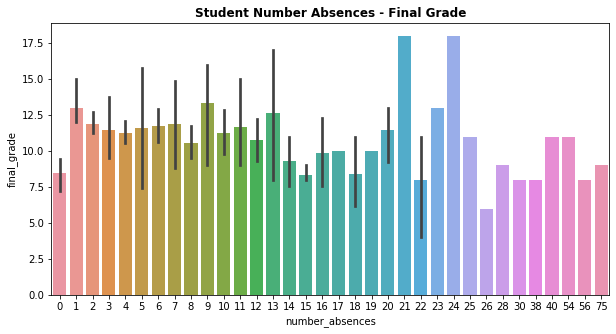

******************************************************


0     115
2      65
4      53
6      31
8      22
10     17
14     12
12     12
3       8
16      7
7       7
5       5
18      5
20      4
11      3
9       3
13      3
15      3
22      3
1       3
38      1
30      1
40      1
23      1
19      1
28      1
75      1
21      1
24      1
56      1
26      1
54      1
25      1
17      1
Name: number_absences, dtype: int64

In [59]:
plt.figure(figsize=(10,5))
sns.barplot(x="number_absences", y="final_grade", data=dataset)
plt.title('Student Number Absences - Final Grade', fontweight='bold')
plt.show()

check_value_counts(dataset.number_absences)

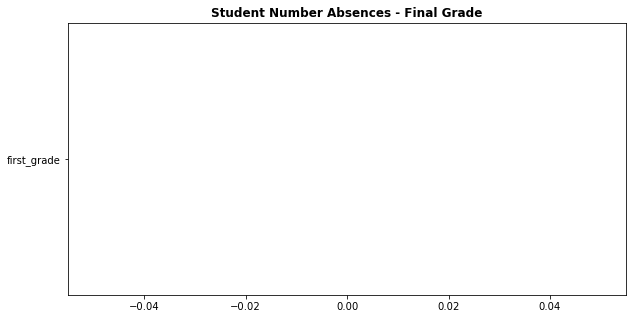

******************************************************


0     115
2      65
4      53
6      31
8      22
10     17
14     12
12     12
3       8
16      7
7       7
5       5
18      5
20      4
11      3
9       3
13      3
15      3
22      3
1       3
38      1
30      1
40      1
23      1
19      1
28      1
75      1
21      1
24      1
56      1
26      1
54      1
25      1
17      1
Name: number_absences, dtype: int64

In [61]:
plt.figure(figsize=(10,5))
plt.plot('first_grade')
plt.title('Student First Grade - Final Grade', fontweight='bold')
plt.show()

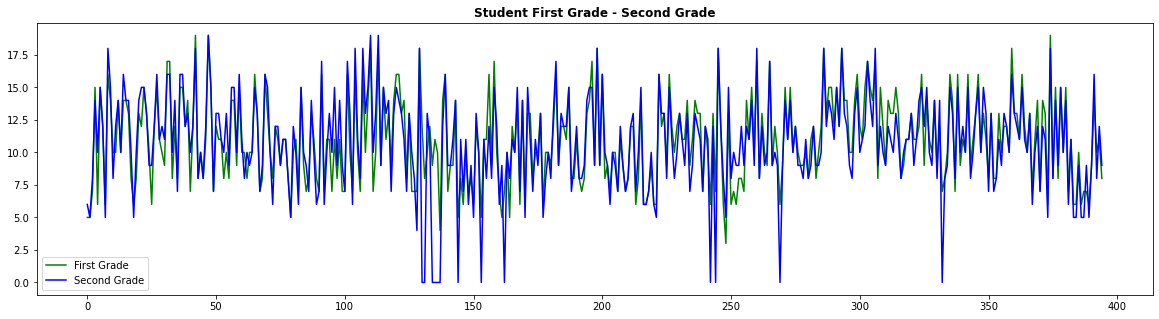

In [86]:
plt.figure(figsize=(20,5))
plt.plot(dataset.first_grade, color='g')
plt.plot(dataset.second_grade, color='b')

plt.legend(['First Grade', 'Second Grade'])
plt.title("Student First Grade - Second Grade", fontweight='bold')
plt.show()

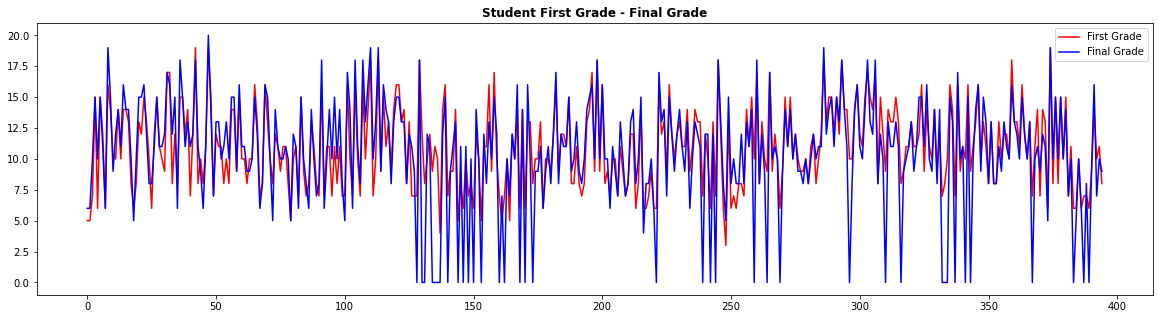

In [83]:
plt.figure(figsize=(20,5))
plt.plot(dataset.first_grade, color='r')
plt.plot(dataset.final_grade, color='b')

plt.legend(['First Grade', 'Final Grade'])
plt.title("Student First Grade - Final Grade", fontweight='bold')
plt.show()

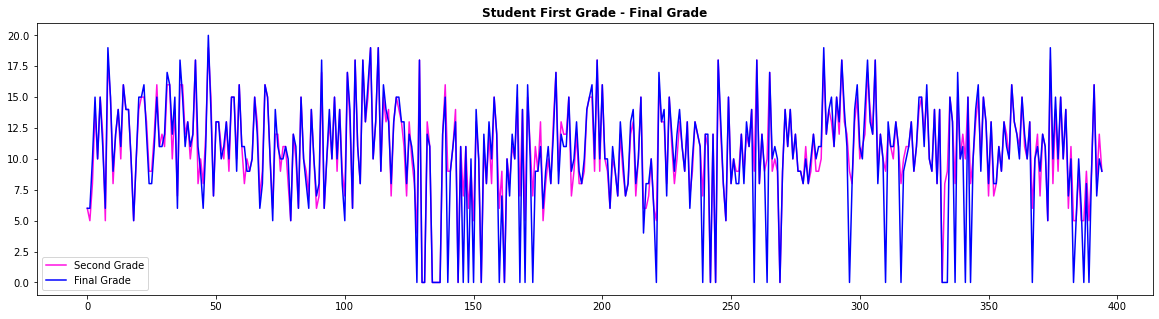

In [87]:
""" We can see the different between second grade and final grade"""

plt.figure(figsize=(20,5))

plt.plot(dataset.second_grade, color='#FF0FE2')
plt.plot(dataset.final_grade, color='b')

plt.legend(['Second Grade', 'Final Grade'])

plt.title("Student First Grade - Final Grade", fontweight='bold')
plt.show()

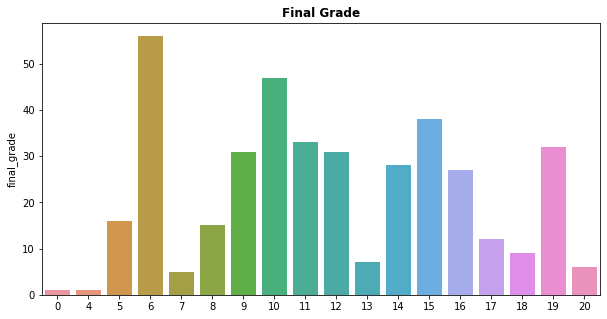

In [97]:
#final grade
plt.figure(figsize=(10,5))
sns.barplot(x=dataset.final_grade.unique(), y=dataset.final_grade.value_counts(), data=dataset)
plt.title("Final Grade" , fontweight='bold')
plt.show()